## Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction ^_^

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [194]:
#importing the necessary libraries we will be using
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [195]:
#to set the style for our plots
sns.set_style("darkgrid")

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [196]:
#to load our data in a data frame called df_ab 
df_ab = pd.read_csv("ab_data.csv")
#to show the first 5 rows of our data frame
df_ab.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [197]:
#to show the size of our data (number of rows, number of columns)
df_ab.shape

(294478, 5)

c. The number of unique users in the dataset.

In [198]:
#to show the number of unique users in our data frame
df_ab['user_id'].nunique()

290584

d. The proportion of users converted.

In [199]:
#to find the proportion of users converted
df_ab['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [200]:
#to check if treatment group have the old page or if control group have the new page
(len(df_ab.query("landing_page == 'new_page' & group != 'treatment'")) +
len(df_ab.query("landing_page != 'new_page' & group == 'treatment'")))

3893

f. Do any of the rows have missing values?

In [201]:
#checking for missing values in the data frame
df_ab.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [202]:
#making a new data frame called df2 
#where we will drop the rows in which treatment group have the old page or control group have the new page
df2 = df_ab.query("group == 'treatment' & landing_page == 'new_page' | landing_page == 'old_page' & group == 'control' ")

In [203]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [204]:
#to show the number of unique users in our new data frame
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [205]:
#showing the nun unique user's id and row number
df2['user_id'][df2['user_id'].duplicated() == True]

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [206]:
#to show the data for the nun unique user
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [207]:
#to drop the duplicated row keeoing the first one 
df2 = df2.drop_duplicates(subset ="user_id",keep = 'first')

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [208]:
#to find the proportion of users converted in our new data frame
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [209]:
#to find the proportion of users converted for the control group
df2.query("group == 'control'")['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [210]:
#to find the proportion of users converted for the treatment group
df2.query("group == 'treatment'")['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [211]:
#to find the proportion of users that received the new page
len(df2.query("landing_page == 'new_page'")) / len(df2)

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

__The Answer.__
>__from the above results we can see that the control group has a conversion rate of about (12.0386 %) and the treat ment group has a conversion rate of about (11.8808 %) and overall conversion rate is (11.9597 %)and also the  proportion of users that received the new page is(50.00619 % ) which means there is a nearly equal chance or receiving the old or the new page__
<br>
><br>__this shows that the conversion rate for the control group is a bit higher than treat ment conversion rate.__
<br>
><br>__there is no sufficient evidence to conclude that the new treatment page leads to more or low conversions as the conversion rate is nearly the same for control and treatment groups.__

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

__The Answer.__
>__as it is type I error so (we decided the alternative to be true, but in reality the null is true)__
<br>__as ( α ) error equals 5% it is a high percentage of error__

><br>__the null hypothesis ($H_{0} $) :we assume that the old page is doing as well or better than the new page >> ( $p_{new} - p_{old}  <= 0 $)__
<br>
><br>__The Alternative hypothesis ($H_{1} $) :we assume that the new page is better than the old page >>in other words ( $p_{new} - p_{old}  > 0 $)__

><br>__this is a one-sided t-test, as are testing for the possibility of the relationship in one direction (old page have higher conversion rate ).__

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [212]:
#conversion rate for new page which we assumed to be equal to converted rate in ab_data.csv regardless of the page.
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [213]:
#conversion rate for old page which we assumed to be equal to converted rate in ab_data.csv regardless of the page also.
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [214]:
#the number of individuals in the treatment group
n_new = len(df2.query("group == 'treatment'"))
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [215]:
#the number of individuals in the control group.
n_old = len(df2.query("group == 'control'"))
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [216]:
#simulating the null hypothesis for the new page to create 1D array of size = n_new
#with propapility of 1's (page converted) = p_new
#with propapility of 0's (page not converted) = 1 - p_new
new_page_converted = np.random.binomial(n=1, p=p_new, size=n_new)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [217]:
#simulating the null hypothesis for the old page to create 1D array of size = n_old
#with propapility of 1's (page converted) = p_old
#with propapility of 0's (page not converted) = 1 - p_old
old_page_converted = np.random.binomial(n=1, p=p_old, size=n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [218]:
#to calculate conversion average for new page
p_new = new_page_converted.mean()
#to calculate conversion average for old page
p_old = old_page_converted.mean()
p_new - p_old

0.00032135147024521526

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [219]:
#to run our simulation 10000 times
#old_page and new_page lists are created to store values for p_new and p_old
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

In [220]:
#to show our array
p_diffs

array([-0.00066262,  0.00072755,  0.00032843, ..., -0.00133743,
       -0.00225973, -0.0005869 ])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [221]:
#to calculate the actual diff between p_new and p_old to be plotted in the histogram
actual_diff = df2.query("group == 'treatment'")['converted'].mean() - df2.query("group == 'control'")['converted'].mean()

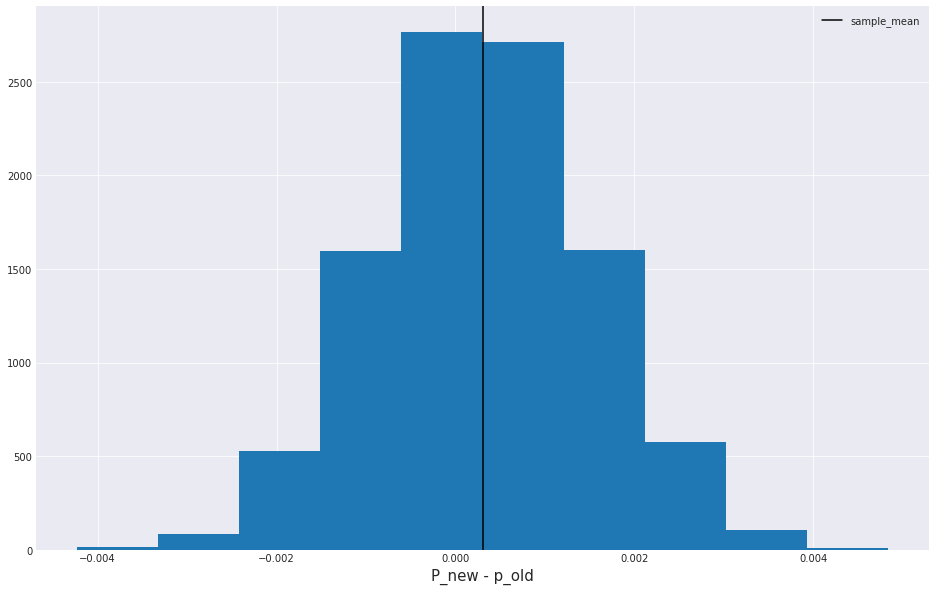

In [222]:
#ploting p_diffs distrbution
plt.figure(figsize=(16,10))
plt.hist(p_diffs);
#to set the x label as p_new - p_old 
plt.xlabel("P_new - p_old", fontsize = 15);
#where is our sample mean
mean_df = p_diffs.mean()
plt.axvline(x=mean_df, color = 'k');
plt.legend(['sample_mean']);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [223]:
#calculating the actual difference between conversion rates for old and new page
actual_diff = df_ab.query("group == 'treatment'")['converted'].mean() - df_ab.query("group == 'control'")['converted'].mean()
actual_diff

-0.0014795997940775518

In [224]:
#calculating p_vale
(p_diffs > actual_diff).mean()

0.93230000000000002

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

__The ANSWER__
><br>what we have computed is defined as the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true
><br>__in scietific studies, it is known as p_value__

><br>__as p_value > α (type I error)... We fail to reject the null hypothesis (which means ..the old page was better)__
><br>as α (type I error) = 5% and our p_value is much higher ( 93.2 %)

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [225]:
import statsmodels.api as sm

#to find the proportion of users converted for the control group
convert_old = df2.query("group == 'control'")['converted'].sum()
#to find the proportion of users converted for the treatment group
convert_new = df2.query("group == 'treatment'")['converted'].sum()
#the number of individuals in the control group
n_old = len(df2.query("group == 'control'"))
#the number of individuals in the treatment group
n_new = len(df2.query("group == 'treatment'"))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [226]:
#>>count<< is the number of successes in nobs trials wich is convert_old and convert_new in our case
#>>nobs<< is the number of trials or observations, with the same length as count
#>>value<< This is the value of the null hypothesis equal to the proportion in the case of a one sample test If
#not provided value = 0 and the null is prop[0] = prop[1]
#>>alternative<< The alternative hypothesis can be two-sided or one of the one- sided tests ('two-sided', 'smaller', 'larger')
#>>prop_var<< (False or float in (0, 1)  If prop_var is false, then the variance of the proportion estimate is
#calculated based on the sample proportion.

stat, pval = sm.stats.proportions_ztest(count = [convert_old, convert_new], nobs = [n_old, n_new], value = 0,
                                        alternative = "smaller", prop_var = 0)

In [227]:
#to show our z_score
z_score = stat
z_score

1.3109241984234394

In [228]:
#to show our p_value
p_value = pval
p_value

0.90505831275902449

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

__The ANSWER__
>__P_value = the probability of observing your statistic, as we can see it is nearly the same as we calculated above there is about only 1% difference between the built in fuction and the manualy way__
><br>__as p_value > α (type I error)... We fail to reject the null hypothesis (which means ..the old page was better)__

><br>__z-score = the number of standard deviations away from the mean of population.__ 
><br>__if we assumed that our confidence interval is ( 95 % ) so our z-score should be more than 1.96 or less than -1.96
and since our z-score = 1.3109 < 1.96 so, we fail to reject the null hypothsis.__

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

__The ANSWER__
>__we should perform a (( logistic regression )), as there is only two possible outcomes (converted or not).__

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [229]:
#to creat intercept column
df2['intercept'] = 1
#to create dummy variable columns
page_dummies = pd.get_dummies(df2.group)
df_new = df2.join(page_dummies)
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [230]:
#to rename treatment dummy column to ab_page
df_new = df_new.rename(columns={'treatment': 'ab_page'})
#to drop control dummy column to make our matrix full rank
df_new.drop("control", axis = 1, inplace = True)

In [231]:
#to show the first 5 rows of our new data frame
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [232]:
l_model = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page']])
results = l_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [233]:
#if we used summary() we will get an error (module 'scipy.stats' has no attribute 'chisqprob')
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-05-20 05:27 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

__The ANSWER__
>__the p_value associated with ab_page is ( P_value = 0.1899 )__
><br>__it differ from p_value in part II because our null and alternative hypotheses is different__

><br>__the null hypothesis ($H_{0} $) :we assume that the old page is doing the same as the new page >> ( $p_{new} - p_{old}  = 0 $)__

><br>__The Alternative hypothesis ($H_{1} $) :we assume that the new page has a different conversion rate from the old page maybe greater or lower >>in other words ( $p_{new} - p_{old}  \neq 0 $)__

><br>__this is a two-sided t-test, as there is only two possible outcomes (converted or not).__

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

__The ANSWER__
>__considering other factors is a good idea as they may have a significant influence on the response  variable.__

><br>__considering other factors may have many disadvantages such as ( test may become more complicated, a linear relationship may not exist between our response and predictor variables,we may have correlated errors or multicollinearity) .__

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [234]:
#to read the countries.csv file and load it in a data frame
df_countries = pd.read_csv("countries.csv")
#to show the first 5 rows of the data frame
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [235]:
#to see how many rows in the data frame
df_countries.shape[0]

290584

In [236]:
#to see how many rows in the data frame
df_new.shape[0]

290584

In [237]:
#to merge the two data frames
df_new = df_new.join(df_countries.country)
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,UK
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,UK
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,UK
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,UK


In [238]:
#to create countries dummy variables
countries_dummies = pd.get_dummies(df_new["country"])
df_new = df_new.join(countries_dummies)
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,UK,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,UK,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,UK,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,UK,0,1,0


In [239]:
#to drop US column so that our matrix be full rank
df_new.drop("US", axis = 1, inplace = True)

In [240]:
#to create and fit our logistic regression model
log_model = sm.Logit(df_new['converted'],df_new[['intercept','ab_page', 'CA', 'UK']])
result2 = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [241]:
#to show the summary results
result2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-05-20 05:27 AIC:              212783.0474
No. Observations:   290584           BIC:              212825.3660
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9891    0.0089  -224.0205  0.0000  -2.0065  -1.9717
ab_page      -0.0150    0.0114    -1.3084  0.1907  -0.0374   0.0074
CA           -0.0258    0.0269    -0.9589  0.3376  -0.0785   0.0269
UK            0.0065    0.0134     0.4850  0.6277  -0.0197   0.0327
==================================================================

"""

In [242]:
np.exp(0.0065), 

(1.0065211708453077,)

In [243]:
1/np.exp(-0.0258)

1.026135700809198

In [244]:
1/np.exp(-0.0150)

1.0151130646157189

>__the p_value for both UK and CA is pretty high so the country doesn't have a significant influence in conversion rate__

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [245]:
df_new['ab_UK'] = df_new['ab_page'] * df_new['UK']
df_new['ab_CA'] = df_new['ab_page'] * df_new['CA']
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK' , 'CA', 'ab_UK', 'ab_CA']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-05-20 05:27 AIC:              212784.6547
No. Observations:   290584           BIC:              212848.1326
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9859    0.0096  -206.7920  0.0000  -2.0047  -1.9670
ab_page      -0.0215    0.0136    -1.5817  0.1137  -0.0482   0.0052
UK            0.0013    0.0188     0.0669  0.9467  -0.0356   0.0381
CA           -0.0675    0.0385    -1.7528  0.0796  -0.1430   0.0080
ab_UK         0.0105    0.0267     0.3937  0.6938  -0.0419   0.0629
ab_CA         0.0825    0.0538     1.5339  0.1251  -0.0229   0.1880
==================================================================

"""

>__p_values for (UK , CA	, ab_page , ab_UK , ab_CA) are all greater than α (type I error) so thay  doesn't have a significant influence in conversion rate__

## conclusions

>__From the above results we can say that we failed to reject the null hypothses and we better stick with it which means (the old page was better than the new one) and we should keep the old page or make another new page anstead of te one we tested.__

In [247]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0